In [190]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from utils import classification_evaluation, user_input, pipe_model

In [191]:
dataframe =  pd.read_csv('../data/cleaned_dataset_2.csv')

In [192]:
X1, y1 = dataframe.drop("cardio", axis=1), dataframe["cardio"]
# use the same test set as in previous lecture
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [193]:
X_train_for_val, X_val, y_train_for_val, y_val = train_test_split(X_train, y_train, test_size=0.2)

X_train_for_val.shape, X_val.shape, y_train_for_val.shape, y_val.shape

((25369, 12), (6343, 12), (25369,), (6343,))

## Standard scaler

In [194]:
scaler = StandardScaler()

param_grid_decision_tree = {"dt__max_depth": [3, 5, 7], "dt__min_samples_leaf": [2, 4, 6]}
pipeline_decision_tree = Pipeline([("scaler", scaler), ("dt", DecisionTreeClassifier())])

classifier_decision_tree = GridSearchCV(
    estimator=pipeline_decision_tree,
    param_grid=param_grid_decision_tree,
    cv=5,
    scoring="accuracy",
)

In [195]:
classifier_decision_tree.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='f1')

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      3160
           1       0.77      0.65      0.71      3183

    accuracy                           0.73      6343
   macro avg       0.73      0.73      0.73      6343
weighted avg       0.73      0.73      0.73      6343



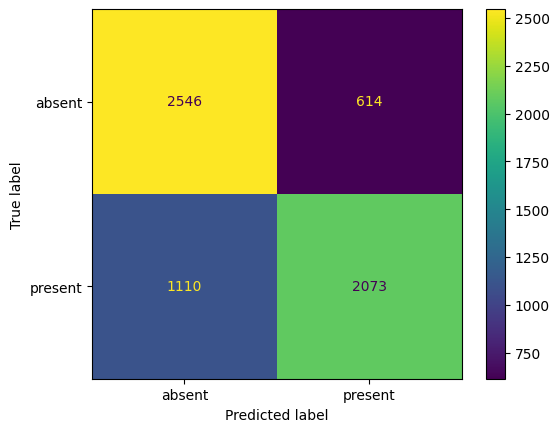

In [196]:
classification_evaluation(model=classifier_decision_tree, x_test=X_val, y_test=y_val)

In [197]:
classifier_decision_tree.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('dt', DecisionTreeClassifier(max_depth=5, min_samples_leaf=2))],
 'verbose': False,
 'scaler': StandardScaler(),
 'dt': DecisionTreeClassifier(max_depth=5, min_samples_leaf=2),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'dt__ccp_alpha': 0.0,
 'dt__class_weight': None,
 'dt__criterion': 'gini',
 'dt__max_depth': 5,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_impurity_decrease': 0.0,
 'dt__min_samples_leaf': 2,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__random_state': None,
 'dt__splitter': 'best'}

In [198]:
#Training entire X_train dataset

classifier_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='f1')

In [199]:
y_predictions = classifier_decision_tree.predict(X_test)

In [200]:
print(y_predictions[:10], y_test[:10].to_list())

[1 0 0 0 1 0 0 0 0 1] [1, 1, 0, 1, 1, 1, 0, 0, 0, 0]


---

## Normalisatin scaler

In [201]:
scaler_min = StandardScaler()

param_grid_decision_tree = {"dt__max_depth": [3, 5, 7], "dt__min_samples_leaf": [2, 4, 6]}
pipeline_decision_tree = Pipeline([("scaler", scaler_min), ("dt", DecisionTreeClassifier())])

classifier_decision_tree_min = GridSearchCV(
    estimator=pipeline_decision_tree,
    param_grid=param_grid_decision_tree,
    cv=5,
    scoring="accuracy",
)

In [202]:
classifier_decision_tree_min.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='f1')

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      3160
           1       0.77      0.65      0.71      3183

    accuracy                           0.73      6343
   macro avg       0.73      0.73      0.73      6343
weighted avg       0.73      0.73      0.73      6343



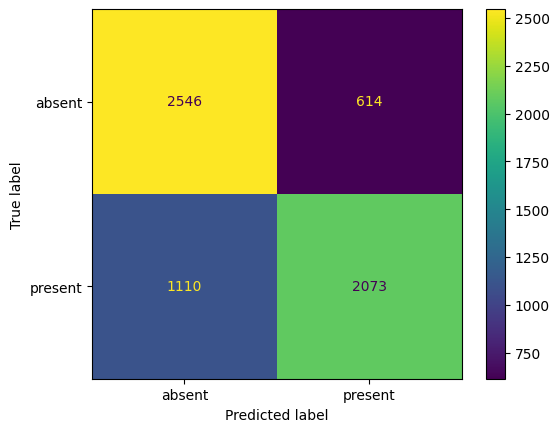

In [203]:
classification_evaluation(model=classifier_decision_tree_min, x_test=X_val, y_test=y_val)

In [204]:
classifier_decision_tree_min.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='f1')

In [205]:
y_predictions_min = classifier_decision_tree_min.predict(X_test)

In [206]:
print(y_predictions_min[:10], y_test[:10].to_list())

[1 0 0 0 1 0 0 0 0 1] [1, 1, 0, 1, 1, 1, 0, 0, 0, 0]


----

## Dataframe 2

### Standard scaler

In [207]:
dataframe_2 = pd.read_csv('../data/cleaned_dataset_1.csv')
X2, y2 = dataframe.drop("cardio", axis=1), dataframe["cardio"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)
X2_train_for_val, X2_val, y2_train_for_val, y2_val = train_test_split(X2_train, y2_train, test_size=0.2)

X2_train_for_val.shape, X2_val.shape, y2_train_for_val.shape, y2_val.shape

((25369, 12), (6343, 12), (25369,), (6343,))

In [208]:
classifier_decision_tree.fit(X2_train_for_val, y2_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='f1')

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      3270
           1       0.75      0.67      0.71      3073

    accuracy                           0.73      6343
   macro avg       0.73      0.73      0.73      6343
weighted avg       0.73      0.73      0.73      6343



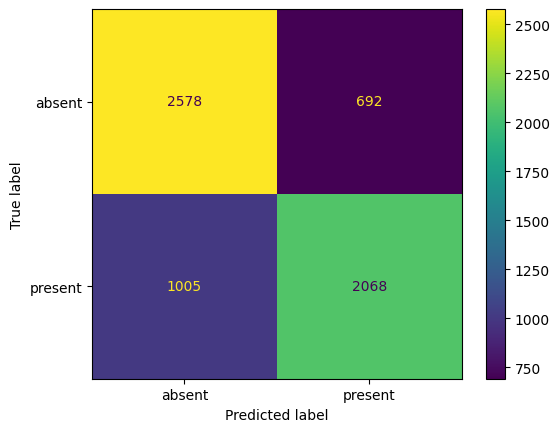

In [209]:
classification_evaluation(model=classifier_decision_tree, x_test=X2_val, y_test=y2_val)

In [210]:
classifier_decision_tree.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='f1')

In [211]:
y_predictions = classifier_decision_tree.predict(X2_test)

In [212]:
print(y_predictions[:10], y2_test[:10].to_list())

[1 0 0 1 0 1 1 1 0 1] [0, 0, 0, 1, 0, 1, 1, 1, 0, 1]


### Using normalisation for dataset 2

In [213]:
classifier_decision_tree_min.fit(X2_train_for_val, y2_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='f1')

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      3270
           1       0.75      0.67      0.71      3073

    accuracy                           0.73      6343
   macro avg       0.73      0.73      0.73      6343
weighted avg       0.73      0.73      0.73      6343



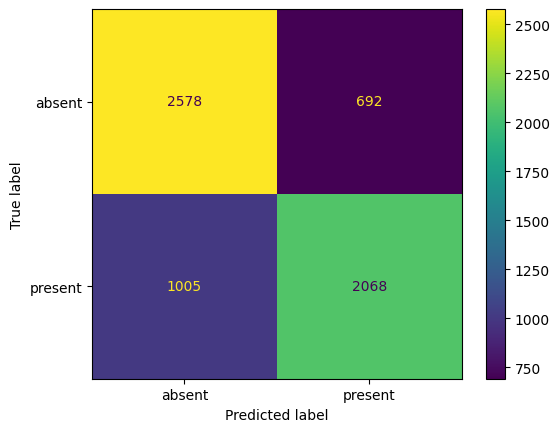

In [214]:
classification_evaluation(model=classifier_decision_tree_min, x_test=X2_val, y_test=y2_val)


In [215]:
classifier_decision_tree_min.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 5, 7],
                         'dt__min_samples_leaf': [2, 4, 6]},
             scoring='f1')

In [216]:
y_predictions_min = classifier_decision_tree_min.predict(X2_test)

In [217]:
print(y_predictions_min[:10], y2_test[:10].to_list())

[1 0 0 1 0 1 1 1 0 1] [0, 0, 0, 1, 0, 1, 1, 1, 0, 1]
